## Austin Animal Center Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
animal = pd.read_csv('austin-animal-center-intakes-1.csv')

In [3]:
animal.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A748291,*Madison,05/01/2017 02:26:00 PM,05/01/2017 02:26:00 PM,S Pleasant Valley Rd And E Riverside Dr in Aus...,Stray,Normal,Dog,Intact Female,10 months,Pit Bull Mix,Black
1,A750529,NaN,05/28/2017 01:22:00 PM,05/28/2017 01:22:00 PM,8312 North Ih 35 in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Miniature Schnauzer Mix,White/Cream
2,A730601,NaN,07/07/2016 12:11:00 PM,07/07/2016 12:11:00 PM,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,7 months,Domestic Shorthair Mix,Blue Tabby
3,A748238,NaN,05/01/2017 10:53:00 AM,05/01/2017 10:53:00 AM,Airport Blvd And Oak Springs Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 years,Bichon Frise Mix,White
4,A683644,*Zoey,07/13/2014 11:02:00 AM,07/13/2014 11:02:00 AM,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,4 weeks,Border Collie Mix,Brown/White


In [33]:
animal_cut2 = animal.sample(1000)
animal_cut2.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
49561,A693885,Rufio,11/01/2015 12:04:00 PM,11/01/2015 12:04:00 PM,2101 Elmont Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,1 year,Boxer Mix,Brown Brindle/White
72807,A744156,Stony,02/24/2017 08:48:00 AM,02/24/2017 08:48:00 AM,Pflugerville (TX),Owner Surrender,Normal,Dog,Intact Male,15 years,Miniature Poodle Mix,White
54816,A752890,*Katerina,06/28/2017 04:20:00 PM,06/28/2017 04:20:00 PM,3651 S Ih 35 Frontage Rd in Austin (TX),Stray,Normal,Cat,Intact Female,2 months,Domestic Shorthair Mix,Black/White
57275,A755372,NaN,08/02/2017 01:01:00 PM,08/02/2017 01:01:00 PM,Hunter Bend Rd in Austin (TX),Stray,Normal,Dog,Intact Male,2 months,Shih Tzu Mix,White/Brown
30262,A752899,*Lorraine,06/28/2017 05:25:00 PM,06/28/2017 05:25:00 PM,2405 South 6Th St in Austin (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Shorthair Mix,White/Orange


In [42]:
for i in animal_cut2['MonthYear']:
    print(i[:2])

11
02
06
08
06
07
07
02
12
11
08
12
09
01
04
04
04
11
08
03
07
04
08
05
11
05
05
03
10
03
12
03
08
03
10
12
11
07
02
09
09
03
03
05
06
09
04
09
07
05
10
10
11
07
08
11
09
08
06
10
08
04
06
05
08
09
05
06
11
05
09
04
03
09
10
11
06
02
03
07
02
04
10
12
11
12
06
10
09
06
04
12
05
06
12
08
01
07
10
10
05
08
11
10
09
11
02
05
09
08
02
12
10
06
12
12
05
11
10
08
05
11
10
03
12
08
07
07
06
06
09
11
06
04
06
05
11
06
05
05
01
01
11
11
11
07
04
02
10
01
06
05
01
08
06
02
09
10
10
10
08
07
04
04
03
10
12
03
04
09
12
06
06
06
04
11
05
09
10
02
11
12
01
07
02
11
10
03
08
10
01
05
09
07
11
06
08
11
10
02
02
12
04
04
08
02
06
05
03
04
04
02
05
04
05
08
04
06
08
11
03
05
06
09
08
02
07
06
04
03
07
11
08
10
02
07
12
04
09
11
02
12
05
10
09
08
06
08
01
05
04
03
04
10
05
10
07
10
09
03
06
01
12
07
10
08
01
03
07
04
01
05
09
10
09
04
09
08
05
09
05
02
07
04
08
05
09
09
12
10
12
03
06
06
06
01
01
12
01
05
11
09
04
02
12
07
09
08
09
06
05
05
09
05
04
06
03
08
08
02
02
05
08
10
03
03
09
07
02
06
08
10
01
0

In [4]:
animal_cut = animal.sample(1000)

In [5]:
animal_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 72627 to 49052
Data columns (total 12 columns):
Animal ID           1000 non-null object
Name                690 non-null object
DateTime            1000 non-null object
MonthYear           1000 non-null object
Found Location      1000 non-null object
Intake Type         1000 non-null object
Intake Condition    1000 non-null object
Animal Type         1000 non-null object
Sex upon Intake     1000 non-null object
Age upon Intake     1000 non-null object
Breed               1000 non-null object
Color               1000 non-null object
dtypes: object(12)
memory usage: 101.6+ KB


In [6]:
count = 0
for index, i in enumerate(animal_cut['Age upon Intake']):
    split_i = i.split(' ')
    if split_i[1] == 'years' or split_i[1] == 'year':
        weeks = int(split_i[0]) * 48
    elif split_i[1] == 'months'or split_i[1] == 'month':
        weeks = int(split_i[0]) * 4
    elif split_i[1] == 'weeks' or split_i[1] == 'week':
        weeks = int(split_i[0])
    elif split_i[1] == 'day' or split_i[1] == 'days':
        weeks = int(split_i[0]) / 4
    else:
        count += 1
    animal_cut['Age upon Intake'].iloc[index] = weeks
animal_basic = animal

In [7]:
animal_cut = animal_cut.drop(['Animal ID', 'Name', 'MonthYear', 'DateTime', 'Found Location'], axis = 1)

In [13]:
animal_cut.head(10)

,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
72627,Stray,Normal,Cat,Intact Female,3,Domestic Shorthair Mix,Brown Tabby/White
64638,Stray,Normal,Cat,Unknown,2,Domestic Shorthair Mix,Brown Tabby
13489,Stray,Normal,Cat,Intact Male,12,Domestic Shorthair Mix,Blue
7135,Stray,Normal,Cat,Intact Male,4,Domestic Shorthair Mix,Black
19886,Stray,Normal,Dog,Spayed Female,240,Australian Cattle Dog Mix,Tricolor
69796,Stray,Normal,Dog,Intact Female,192,Pit Bull/Labrador Retriever,White/Brown Brindle
59862,Owner Surrender,Normal,Dog,Intact Male,48,Dachshund Mix,Black/White
34129,Public Assist,Normal,Dog,Spayed Female,96,Pit Bull Mix,Chocolate/White
57787,Stray,Normal,Cat,Intact Female,48,Siamese Mix,White/Black
65943,Stray,Normal,Cat,Intact Male,3,Domestic Shorthair Mix,Blue Tabby


In [12]:
animal_cut['Animal Type'].value_counts()

Dog      562
Cat      381
Other     52
Bird       5
Name: Animal Type, dtype: int64

In [30]:
Color_count = animal_cut['Color'].value_counts()

In [31]:
Color_list = Color_count[animal_cut['Color'].value_counts() < 5].index

In [32]:
for index, i in enumerate(animal_cut['Color']):
    if i in Color_list:
        animal_cut['Color'].iloc[index] = 'Other'
animal_cut['Color'].value_counts()

Other                  105
Black/White             87
Black                   80
Brown Tabby             66
White                   51
Tan                     34
Brown                   33
Brown Tabby/White       32
Blue/White              32
Tricolor                30
Brown/White             29
Tan/White               25
Brown Brindle/White     25
White/Black             23
Calico                  23
Orange Tabby            23
White/Brown             21
Tortie                  20
Black/Brown             19
Black/Tan               19
Blue                    19
White/Tan               18
Red                     17
Blue Tabby              16
Orange Tabby/White      14
Chocolate/White         14
Torbie                  12
Red/White               12
Sable                   11
Brown Brindle           10
Brown/Black             10
Gray                     9
Tan/Black                9
Blue Tabby/White         8
Black/Gray               8
Buff                     6
Yellow                   5
F

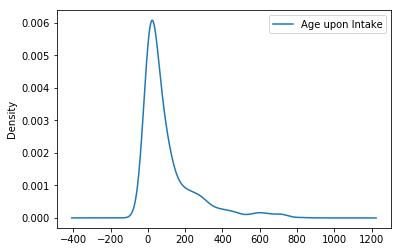

In [43]:
animal_cut.plot(kind = 'kde', x = 'Sex upon Intake')